## OASIS INFOBYTE DATA SCIENCE INTERNSHIP TASK 4 - EMAIL SPAM DETECTION WITH MACHINE LEARNING

# DHAIRYA SAATOLIYA

## Importing required libraries and Data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
sp = pd.read_csv('/content/spam.csv', encoding='iso-8859-1') # since the data contain utf-8 characters
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##Information about the data


In [75]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [76]:
sp.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [77]:
sp.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## Data Preprocessing

Removing the Unnamed columns

In [78]:
del sp['Unnamed: 2']
del sp['Unnamed: 3']
del sp['Unnamed: 4']


In [79]:
sp.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
sp.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [80]:
spam = sp.groupby('Category')['Message'].count()
spam

Category
ham     4825
spam     747
Name: Message, dtype: int64

# Providing index 1 for Spam and 0 for Ham

In [81]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
sp['spam'] = label_encoder.fit_transform(sp['Category'])
sp.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Splitting the data for Training

In [82]:
x = sp['Message']
y = sp['spam']

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

##### Apply CountVectorizer

Using CountVectorizer from sklearn so as to make machine understand the message better

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [85]:
# Email converted into number matrix

x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

About the Classifier- MultinomialNB(Naive Bayes) Classifier

Multinomial Naive Bayes: Assumes that the features represent discrete counts, such as word frequencies in a text classification task. This variant is suitable for data with a limited number of possible values.

## Model Implimentation (MultinomialNB)

In [86]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

## Model training

In [87]:
model.fit(x_train_count, y_train)

MultinomialNB()

## Evaluating the model

In [88]:
emails = [ 'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [89]:
x_test_count = v.transform(x_test)
model.predict(x_test_count)

array([0, 1, 0, ..., 0, 1, 0])

In [90]:
model.score(x_test_count, y_test)

0.986244019138756

In [91]:
pred = model.predict(x_test_count)

## Confusion Matrix
1 Denotes Spam

0 Denotes Ham

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


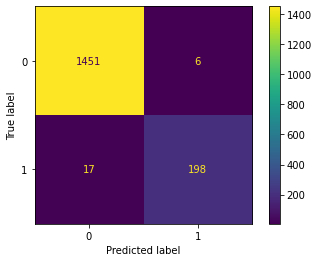

In [92]:
from sklearn.metrics import plot_confusion_matrix

ps=plot_confusion_matrix(model,x_test_count,y_test)


## --END OF CODE --


---

